In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math
import pandas as pd
import functions as f
import sys, importlib
plt.rcParams.update({'font.size':20})

## Comparing ascending and descending in the multinomial model

In [8]:
with open('../model_output_files/mean_variance_stubbing.json', 'r') as file:
    results = json.load(file)

In [9]:
ns = np.zeros(235)
for i in range(1,100):
    ns[i-1] = i*10
for i in range(1,100):
    ns[98 + i] = i*1000
for i in range(0,37):
    ns[198 + i] = i*25_000 + 100_000

In [10]:
means = np.zeros((2,235))
vars = np.zeros((2,235))
for j in range(2):
    for i in range(235):
        means[j][i] = results[j][i]['mean']
        vars[j][i] = results[j][i]['var']
means = means / (1 + means)
vars = vars / (1 + vars)

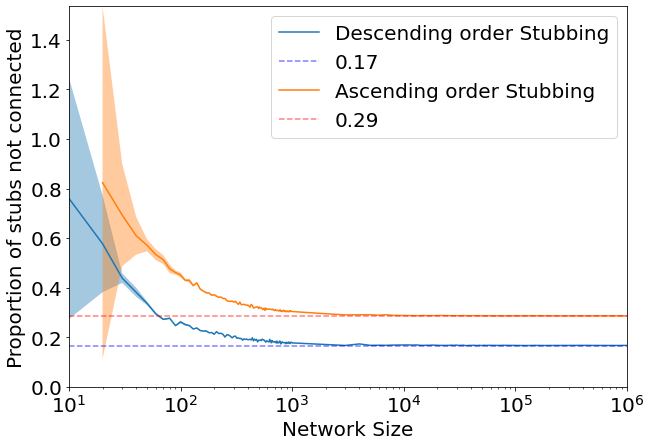

In [5]:
plt.figure(figsize=(10,7))
plt.plot(ns, means[0], label='Descending order Stubbing')
plt.fill_between(ns, means[0] - vars[0], means[0] + vars[0], alpha=0.4)
plt.plot([10,1e6], [min(means[0]), min(means[0])], '--b', alpha = 0.5, label = f'{round(min(means[0]),2)}')
plt.plot(ns, means[1], label='Ascending order Stubbing')
plt.fill_between(ns, means[1] - vars[1], means[1] + vars[1], alpha=0.4)
plt.plot([10,1e6], [min(means[1][1:]), min(means[1][1:])], '--r', alpha = 0.5, label = f'{round(min(means[1][1:]),2)}')
plt.xscale(value='log')
plt.ylabel('Proportion of stubs not connected')
plt.xlabel('Network Size')
# plt.yscale(value='log')
plt.ylim([0,max(means[1][1:]) + max(vars[1][1:])])
plt.xlim([10,1e6])
plt.legend()
plt.savefig("../../../../figures/important/3. stubbing/ascending_vs_descending.png", bbox_inches="tight")
plt.show()

### with improvement

In [7]:
with open('../model_output_files/fixed_mean_variance_stubbing.json', 'r') as file:
    fixed_results = json.load(file)

In [20]:
ns1 = np.zeros(len(fixed_results[0]))
for i in range(1,100):
    ns1[i-1] = i
for i in range(1,100):
    ns1[98 + i] = i*100
for i in range(1,101):
    ns1[197 + i] = i*10_000

# let mut ns: Vec<usize> = (1..100).collect();
# ns.append(&mut (1..100).map(|x| x*100).collect());
# ns.append(&mut (1..=100).map(|x| x*10_000).collect());

In [21]:
means1 = np.zeros((2,len(fixed_results[0])))
vars1 = np.zeros((2,len(fixed_results[0])))
for j in range(2):
    for i in range(len(fixed_results[0])):
        means1[j][i] = fixed_results[j][i]['mean']
        vars1[j][i] = fixed_results[j][i]['var']
means1 = means1 / (1 + means1)
vars1 = vars1 / (1 + vars1)

/tmp/ipykernel_7416/3073944280.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--b" (-> color='b'). The keyword argument will take precedence.
  plt.plot([10,1e6], [min(means[0]), min(means[0])], '--b', alpha = 0.5, label = f'{round(min(means[0]),2)}', color='blue')
/tmp/ipykernel_7416/3073944280.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--b" (-> color='b'). The keyword argument will take precedence.
  plt.plot([10,1e6], [min(means1[0][9:]), min(means1[0][9:])], '--b', alpha = 0.5, label = f'{round(min(means1[0][9:]),2)}', color='darkorange')


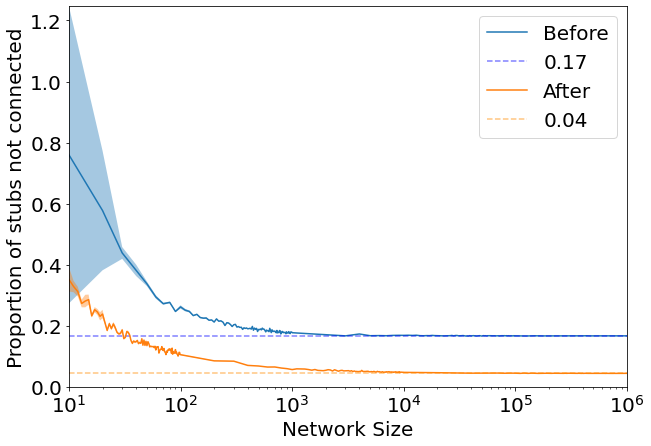

In [32]:
plt.figure(figsize=(10,7))
plt.plot(ns, means[0], label='Before')
plt.fill_between(ns, means[0] - vars[0], means[0] + vars[0], alpha=0.4)
plt.plot([10,1e6], [min(means[0]), min(means[0])], '--b', alpha = 0.5, label = f'{round(min(means[0]),2)}', color='blue')
plt.plot(ns1, means1[0], label='After')
plt.fill_between(ns1, means1[0] - vars1[0], means1[0] + vars1[0], alpha=0.4)
plt.plot([10,1e6], [min(means1[0][9:]), min(means1[0][9:])], '--b', alpha = 0.5, label = f'{round(min(means1[0][9:]),2)}', color='darkorange')
plt.xscale(value='log')
plt.ylabel('Proportion of stubs not connected')
plt.xlabel('Network Size')
# plt.yscale(value='log')
plt.ylim([0,max(means[0]) + max(vars[0])])
plt.xlim([10,1e6])
plt.legend()
plt.savefig("../../../../figures/important/4.fixing/before_vs_after_stubbing.png", bbox_inches="tight")
plt.show()

## Time Complexity

In [2]:
with open('../model_output_files/time_complexity_mean_var.json', 'r') as file:
    fixed_results = json.load(file)

In [7]:
ns1 = np.zeros(len(fixed_results[0]))
for i in range(1,100):
    ns1[i-1] = i*100
for i in range(1,11):
    ns1[98 + i] = i*10_000

means1 = np.zeros((2,len(fixed_results[0])))
vars1 = np.zeros((2,len(fixed_results[0])))
for j in range(2):
    for i in range(len(fixed_results[0])):
        means1[j][i] = fixed_results[j][i]['mean']
        vars1[j][i] = fixed_results[j][i]['var']
# means1 = means1 / (30)
# vars1 = vars1 / (30)
# // let mut ns: Vec<usize> = (1..100).map(|x| x*100).collect();
# // ns.append(&mut (1..=20).map(|x| x*10_000).collect());

In [8]:
len(means1[1])
# in nano seconds
x = np.linspace(100,100_000,10_000)
means1 = means1 / 1_000_000_000
vars1 = np.sqrt(vars1) / 1_000_000_000
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    smoothed.append(scalars[-1])
    return smoothed

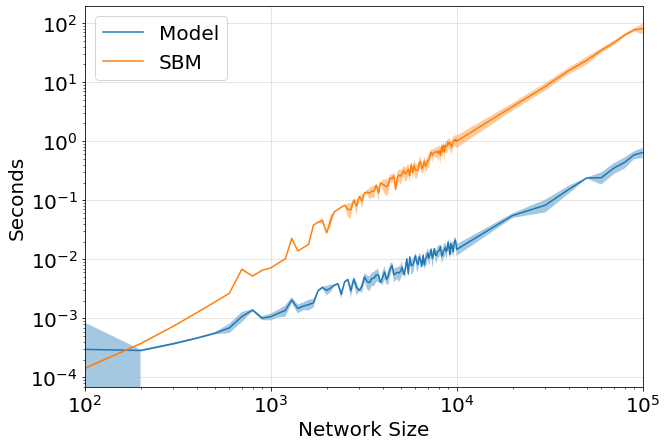

In [10]:

plt.figure(figsize=(10,7))
plt.plot(ns1, means1[0], label='Model')
# plt.plot(ns1, smooth(scalars=means1[0], weight=0.8), label='Model')
plt.fill_between(ns1, means1[0] - vars1[0], means1[0] + vars1[0], alpha=0.4)
# plt.plot([10,1e6], [min(means1[0]), min(means1[0])], '--b', alpha = 0.5, label = f'{round(min(means1[0]),2)}', color='blue')
plt.plot(ns1, means1[1], label='SBM')
# plt.plot(ns1, smooth(means1[1],0.8), label='SBM')
plt.fill_between(ns1, means1[1] - vars1[1], means1[1] + vars1[1], alpha=0.4)
# plt.plot([10,1e6], [min(means1[1]), min(means1[1])], '--b', alpha = 0.5, label = f'{round(min(means1[0][9:]),2)}', color='darkorange')
plt.xscale(value='log')
plt.yscale(value='log')
plt.ylabel('Seconds')
plt.xlabel('Network Size')
# plt.yscale(value='log')
# plt.ylim([0,max(means1[1])])
plt.xlim([100,1e5])
plt.legend()
plt.grid(alpha=0.4)
plt.savefig("../../../../figures/important/4.fixing/complexity.png", bbox_inches="tight")
plt.show()

## Degree distribution of the multinomial model

In [7]:
with open('../model_output_files/network_multi_1.json', 'r') as file:
    network_multi_1 = json.load(file)
with open('../model_output_files/network_multi_2.json', 'r') as file:
    network_multi_2 = json.load(file)
with open('../model_output_files/network_sbm_1.json', 'r') as file:
    network_sbm_1 = json.load(file)
with open('../model_output_files/network_sbm_2.json', 'r') as file:
    network_sbm_2 = json.load(file) 
contacts1 = np.genfromtxt("../../../../data/CoMix_UK/contacts1.csv", delimiter=",")
contacts2 = np.genfromtxt("../../../../data/CoMix_UK/contacts2.csv", delimiter=",")
# df = pd.read_csv("../../../../data/CoMix_UK/merged_df_filter.csv")
# print(df.columns, len(df))
# df_1 = df[(df['sday_id'] >= "2020-07-30") & (df['sday_id'] < "2020-09-03")]
# df_2 = df[(df['sday_id'] >= "2020-09-03") & (df['sday_id'] <= "2020-10-26")]

## Transfer network files into gephi

In [12]:
with open('../networks/network_model2.json', 'r') as file:
    network1 = json.load(file)

In [14]:
nodes = pd.DataFrame(columns=['Id', 'Label', 'Age'])
edges = pd.DataFrame(columns=['Source','Target','Weight'])
count = 0
proportion = 0.1
for i, row in enumerate(network1['adjacency_matrix']):
    if i / len(network1['age_brackets']) > proportion:
        print(proportion)
        proportion += 0.1
    nodes.loc[i] = {
        'Id': i, 'Label': i, 'Age': network1['age_brackets'][i]
    }
    for j, column in enumerate(row):
        edges.loc[i + count] = {
            'Source': i, 'Target': column['j'], 'Weight': 0.5
        }
        count += 1
nodes.to_csv("../../../../data_analysis/Egonetworks/data_sets/network_nodes2.csv",index=False)
edges.to_csv("../../../../data_analysis/Egonetworks/data_sets/network_edges2.csv", index=False)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
